In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
!pip install -q torch torchvision feather-format kornia pyarrow Pillow wandb nbdev fastprogress --upgrade 
!pip install -q git+https://github.com/fastai/fastcore  --upgrade
!pip install -q git+https://github.com/fastai/fastai2 --upgrade
os._exit(00)

In [0]:
from fastai2.basics import *
from fastai2.vision.all import *
from fastai2.callback.all import *

In [2]:
!wget https://zenodo.org/record/53169/files/Kather_texture_2016_image_tiles_5000.zip?download=1
!mv 'Kather_texture_2016_image_tiles_5000.zip?download=1' 'Kather.zip'
!unzip 'Kather.zip'

--2019-12-17 08:36:41--  https://zenodo.org/record/53169/files/Kather_texture_2016_image_tiles_5000.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.95.95
Connecting to zenodo.org (zenodo.org)|188.184.95.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 258098431 (246M) [application/octet-stream]
Saving to: ‘Kather_texture_2016_image_tiles_5000.zip?download=1’

Kather_texture_2016 100%[===================>] 246.14M  17.0MB/s    in 16s     

2019-12-17 08:36:58 (15.6 MB/s) - ‘Kather_texture_2016_image_tiles_5000.zip?download=1’ saved [258098431/258098431]

Archive:  Kather.zip
   creating: Kather_texture_2016_image_tiles_5000/01_TUMOR/
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/10009_CRC-Prim-HE-03_009.tif_Row_301_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/10062_CRC-Prim-HE-02_003b.tif_Row_1_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/100B0_CRC-Prim-HE-09_009.tif_Row_1_Col_30

In [3]:
!ls
#/content/Kather_texture_2016_image_tiles_5000

drive  Kather_texture_2016_image_tiles_5000  Kather.zip  sample_data


In [0]:
birds = DataBlock(blocks=(ImageBlock, CategoryBlock),
                  get_items=get_image_files,
                  splitter=RandomSplitter(0.2),
                  get_y=parent_label)

In [0]:
dbunch = birds.databunch('/content/Kather_texture_2016_image_tiles_5000', item_tfms=RandomResizedCrop(460), bs=32,
                batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)])

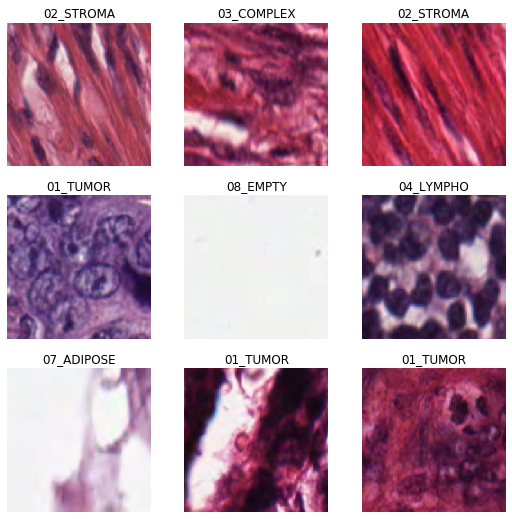

In [6]:

dbunch.show_batch(max_n=9)

In [7]:
dbunch.vocab

(#8) [01_TUMOR,02_STROMA,03_COMPLEX,04_LYMPHO,05_DEBRIS,06_MUCOSA,07_ADIPOSE,08_EMPTY]

In [0]:
from torchvision.models import resnet34

In [9]:
learn = cnn_learner(dbunch, resnet34, pretrained=True, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 230MB/s]


In [10]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,1.256319,0.436143,0.149000,00:25
1,0.828239,0.330464,0.118000,00:25
2,0.686068,0.256190,0.090000,00:24
3,0.596787,0.244707,0.077000,00:24


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()


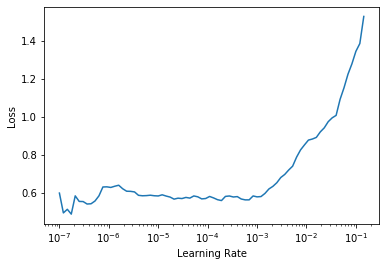

In [13]:
learn.lr_find()


In [14]:
learn.fit_one_cycle(2, lr_max=slice(3e-3, 3e-2))


epoch,train_loss,valid_loss,error_rate,time
0,2.180300,14.661775,0.552000,00:25
1,1.531951,0.772269,0.283000,00:25


In [0]:
learn.save('stage-2')


In [0]:
learn.load('stage-2');

In [17]:
interp = ClassificationInterpretation.from_learner(learn)


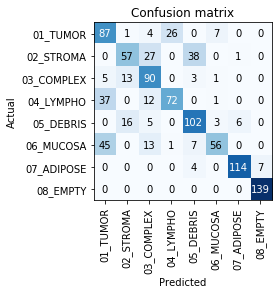

In [18]:
interp.plot_confusion_matrix()


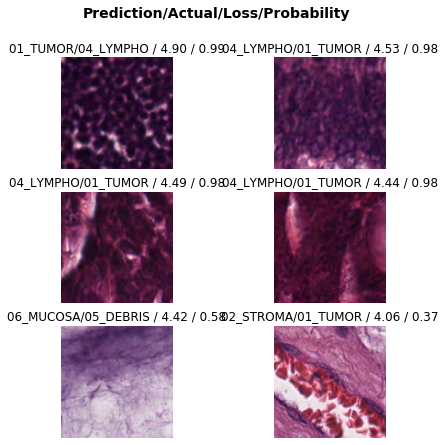

In [21]:
interp.plot_top_losses(6, figsize=(7,7))
